# Cornory Heart Disease: CHD

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.2f}'.format

<h2>About Dataset</h2>
<p>Let us breakdown each column in our dataset:</p>

<ul>
    <li><strong>sex:</strong> This column represents the gender of the individuals (female- male).</li>
    <li><strong>age:</strong> This column represents the age of the individuals in the dataset. Age is a crucial factor in assessing the risk of coronary heart disease.</li>
    <li><strong>education:</strong> This column represents the level of education of the individuals. It could be coded using categorical values indicating different levels of education attainment.</li>
    <li><strong>smokingStatus:</strong> This column likely represents the smoking status of the individuals, indicating whether they are smokers(yes), non-smokers(no).</li>
    <li><strong>cigsPerDay:</strong> If an individual is a smoker, this column represents the number of cigarettes smoked per day.</li>
    <li><strong>BPMeds:</strong> This column indicates whether the individual is taking blood pressure medications (binary: 0 for not taking, 1 for taking).</li>
    <li><strong>prevalentStroke:</strong> This column indicates whether an individual has had a stroke prior to the study (binary: 0 for no, 1 for yes).</li>
    <li><strong>prevalentHyp:</strong> This column indicates whether an individual has hypertension (binary: 0 for no, 1 for yes).</li>
    <li><strong>diabetes:</strong> This column indicates whether an individual has diabetes (binary: 0 for no, 1 for yes).</li>
    <li><strong>totChol:</strong> This column represents the total cholesterol level of the individuals.</li>
    <li><strong>sysBP:</strong> This column represents the systolic blood pressure of the individuals.</li>
    <li><strong>diaBP:</strong> This column represents the diastolic blood pressure of the individuals.</li>
    <li><strong>BMI:</strong> This column represents the Body Mass Index (BMI) of the individuals, which is a measure of body fat based on height and weight.</li>
    <li><strong>heartRate:</strong> This column represents the resting heart rate of the individuals.</li>
    <li><strong>glucose:</strong> This column represents the fasting blood glucose level of the individuals.</li>
    <li><strong>CHDRisk:</strong> This column likely represents the Ten-Year Coronary Heart Disease (CHD) Risk for each individual, which is the target variable that you may want to predict or analyze.</li>
</ul>



# 1. Laod and Explore the dataset

In [2]:
data = pd.read_csv('Heart_Disease.csv')
data.head()

,sex,age,education,smokingStatus,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CHDRisk
0,male,39,4,no,0,0,0,0,no,195,106.00,70.00,26.97,80,77,no
1,female,46,2,no,0,0,0,0,no,250,121.00,81.00,28.73,95,76,no
2,male,48,1,yes,20,0,0,0,no,245,127.50,80.00,25.34,75,70,no
3,female,61,3,yes,30,0,0,1,no,225,150.00,95.00,28.58,65,103,yes
4,female,46,3,yes,23,0,0,0,no,285,130.00,84.00,23.10,85,85,no


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3674 entries, 0 to 3673
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              3663 non-null   object 
 1   age              3674 non-null   int64  
 2   education        3674 non-null   int64  
 3   smokingStatus    3661 non-null   object 
 4   cigsPerDay       3674 non-null   int64  
 5   BPMeds           3674 non-null   int64  
 6   prevalentStroke  3674 non-null   int64  
 7   prevalentHyp     3674 non-null   int64  
 8   diabetes         3674 non-null   object 
 9   totChol          3674 non-null   int64  
 10  sysBP            3674 non-null   float64
 11  diaBP            3674 non-null   float64
 12  BMI              3674 non-null   float64
 13  heartRate        3674 non-null   int64  
 14  glucose          3674 non-null   int64  
 15  CHDRisk          3674 non-null   object 
dtypes: float64(3), int64(9), object(4)
memory usage: 459.4+ KB


In [4]:
# check for null values
data.notna().sum()

sex                3663
age                3674
education          3674
smokingStatus      3661
cigsPerDay         3674
BPMeds             3674
prevalentStroke    3674
prevalentHyp       3674
diabetes           3674
totChol            3674
sysBP              3674
diaBP              3674
BMI                3674
heartRate          3674
glucose            3674
CHDRisk            3674
dtype: int64

In [5]:
# drop null values
data = data.dropna()
# drop duplicates
data = data.drop_duplicates()
data.head()

,sex,age,education,smokingStatus,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CHDRisk
0,male,39,4,no,0,0,0,0,no,195,106.00,70.00,26.97,80,77,no
1,female,46,2,no,0,0,0,0,no,250,121.00,81.00,28.73,95,76,no
2,male,48,1,yes,20,0,0,0,no,245,127.50,80.00,25.34,75,70,no
3,female,61,3,yes,30,0,0,1,no,225,150.00,95.00,28.58,65,103,yes
4,female,46,3,yes,23,0,0,0,no,285,130.00,84.00,23.10,85,85,no


In [6]:
# fix the data type of some cloumns,
# some of them express boolean (True/False) values but are represented as 0/1
# BPMeds, prevalentStroke, prevalentHyp
data['BPMeds'] = data['BPMeds'].astype('object')
data['prevalentStroke'] = data['prevalentStroke'].astype('object')
data['prevalentHyp'] = data['prevalentHyp'].astype('object')

data.loc[:, 'BPMeds'] = data['BPMeds'].replace([0, 1], ['no', 'yes'])
data.loc[:,'prevalentStroke'] = data['prevalentStroke'].replace([0, 1], ['no', 'yes'])
data.loc[:, 'prevalentHyp'] = data['prevalentHyp'].replace([0, 1], ['no', 'yes'])

data.head()

,sex,age,education,smokingStatus,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CHDRisk
0,male,39,4,no,0,no,no,no,no,195,106.00,70.00,26.97,80,77,no
1,female,46,2,no,0,no,no,no,no,250,121.00,81.00,28.73,95,76,no
2,male,48,1,yes,20,no,no,no,no,245,127.50,80.00,25.34,75,70,no
3,female,61,3,yes,30,no,no,yes,no,225,150.00,95.00,28.58,65,103,yes
4,female,46,3,yes,23,no,no,no,no,285,130.00,84.00,23.10,85,85,no


In [7]:
# describe numerical data
data.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
age,"3,637.00",49.55,8.56,32.00,42.00,49.00,56.00,70.00
education,"3,637.00",1.98,1.02,1.00,1.00,2.00,3.00,4.00
cigsPerDay,"3,637.00",9.03,11.91,0.00,0.00,0.00,20.00,70.00
totChol,"3,637.00",236.88,44.13,113.00,206.00,234.00,263.00,600.00
sysBP,"3,637.00",132.36,22.08,83.50,117.00,128.00,144.00,295.00
diaBP,"3,637.00",82.90,11.96,48.00,75.00,82.00,90.00,142.50
BMI,"3,637.00",25.79,4.06,15.54,23.08,25.38,28.04,56.80
heartRate,"3,637.00",75.75,11.99,44.00,68.00,75.00,82.00,143.00
glucose,"3,637.00",81.81,23.77,40.00,71.00,78.00,87.00,394.00


In [8]:
# describe categorical data
data.describe(include='object').T

,count,unique,top,freq
sex,3637,2,female,2026
smokingStatus,3637,2,no,1857
BPMeds,3637,2,no,3527
prevalentStroke,3637,2,no,3616
prevalentHyp,3637,2,no,2502
diabetes,3637,2,no,3540
CHDRisk,3637,2,no,3084


# 2. Understand the dataset

In [9]:
for column in data.select_dtypes('object'):
    unique_values = data[column].unique()
    print(data[column].value_counts().reset_index().sort_values(column))
    print('*'*50)

      sex  count
0  female   2026
1    male   1611
**************************************************
  smokingStatus  count
0            no   1857
1           yes   1780
**************************************************
  BPMeds  count
0     no   3527
1    yes    110
**************************************************
  prevalentStroke  count
0              no   3616
1             yes     21
**************************************************
  prevalentHyp  count
0           no   2502
1          yes   1135
**************************************************
  diabetes  count
0       no   3540
1      yes     97
**************************************************
  CHDRisk  count
0      no   3084
1     yes    553
**************************************************


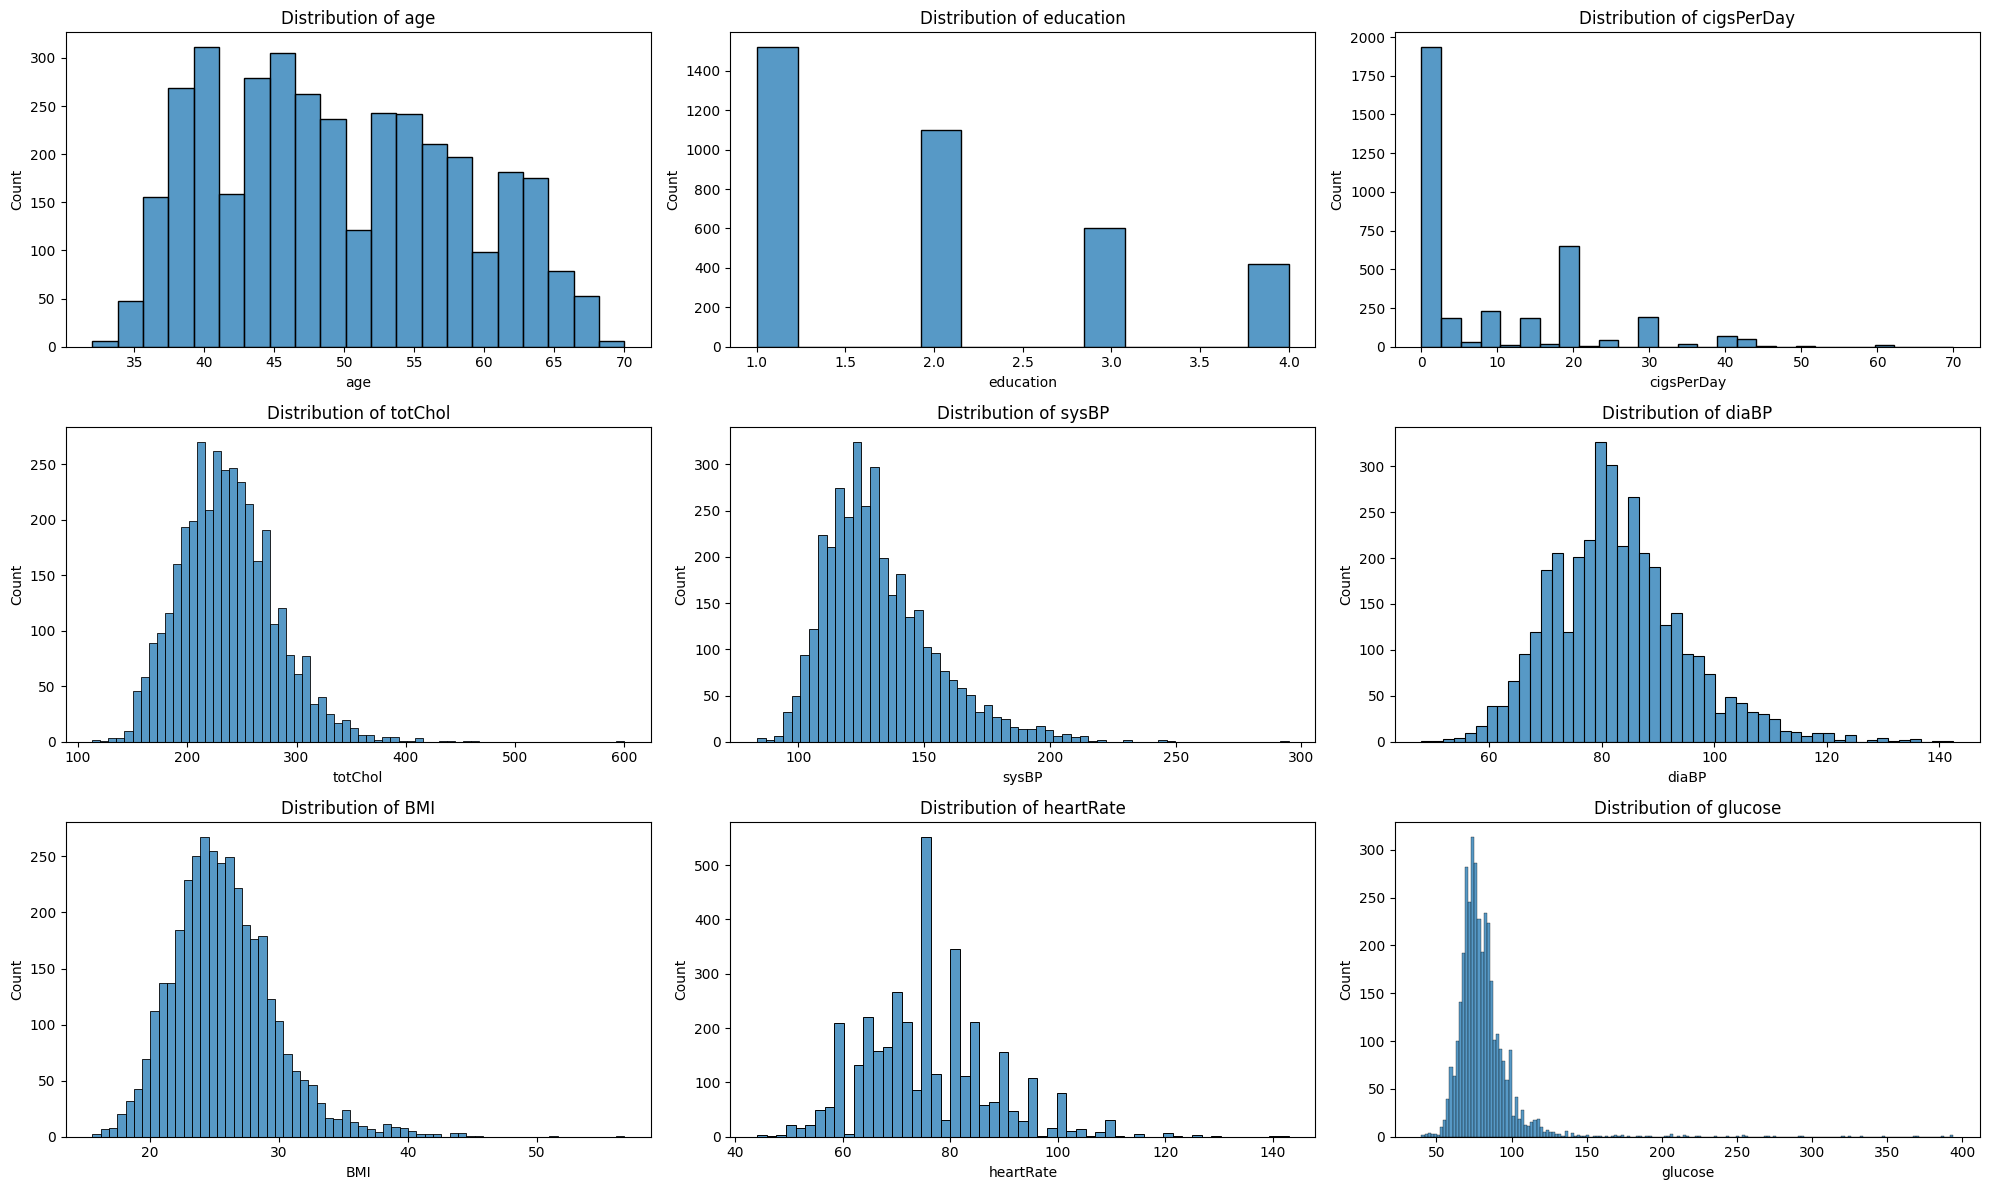

In [10]:
plt.figure(figsize=(20,12))
for index, column in enumerate(data.select_dtypes('number')):
    plt.subplot(3, 3, index+1)
    sns.histplot(data[column]).set_title('Distribution of '+ column)
    plt.tight_layout()
    

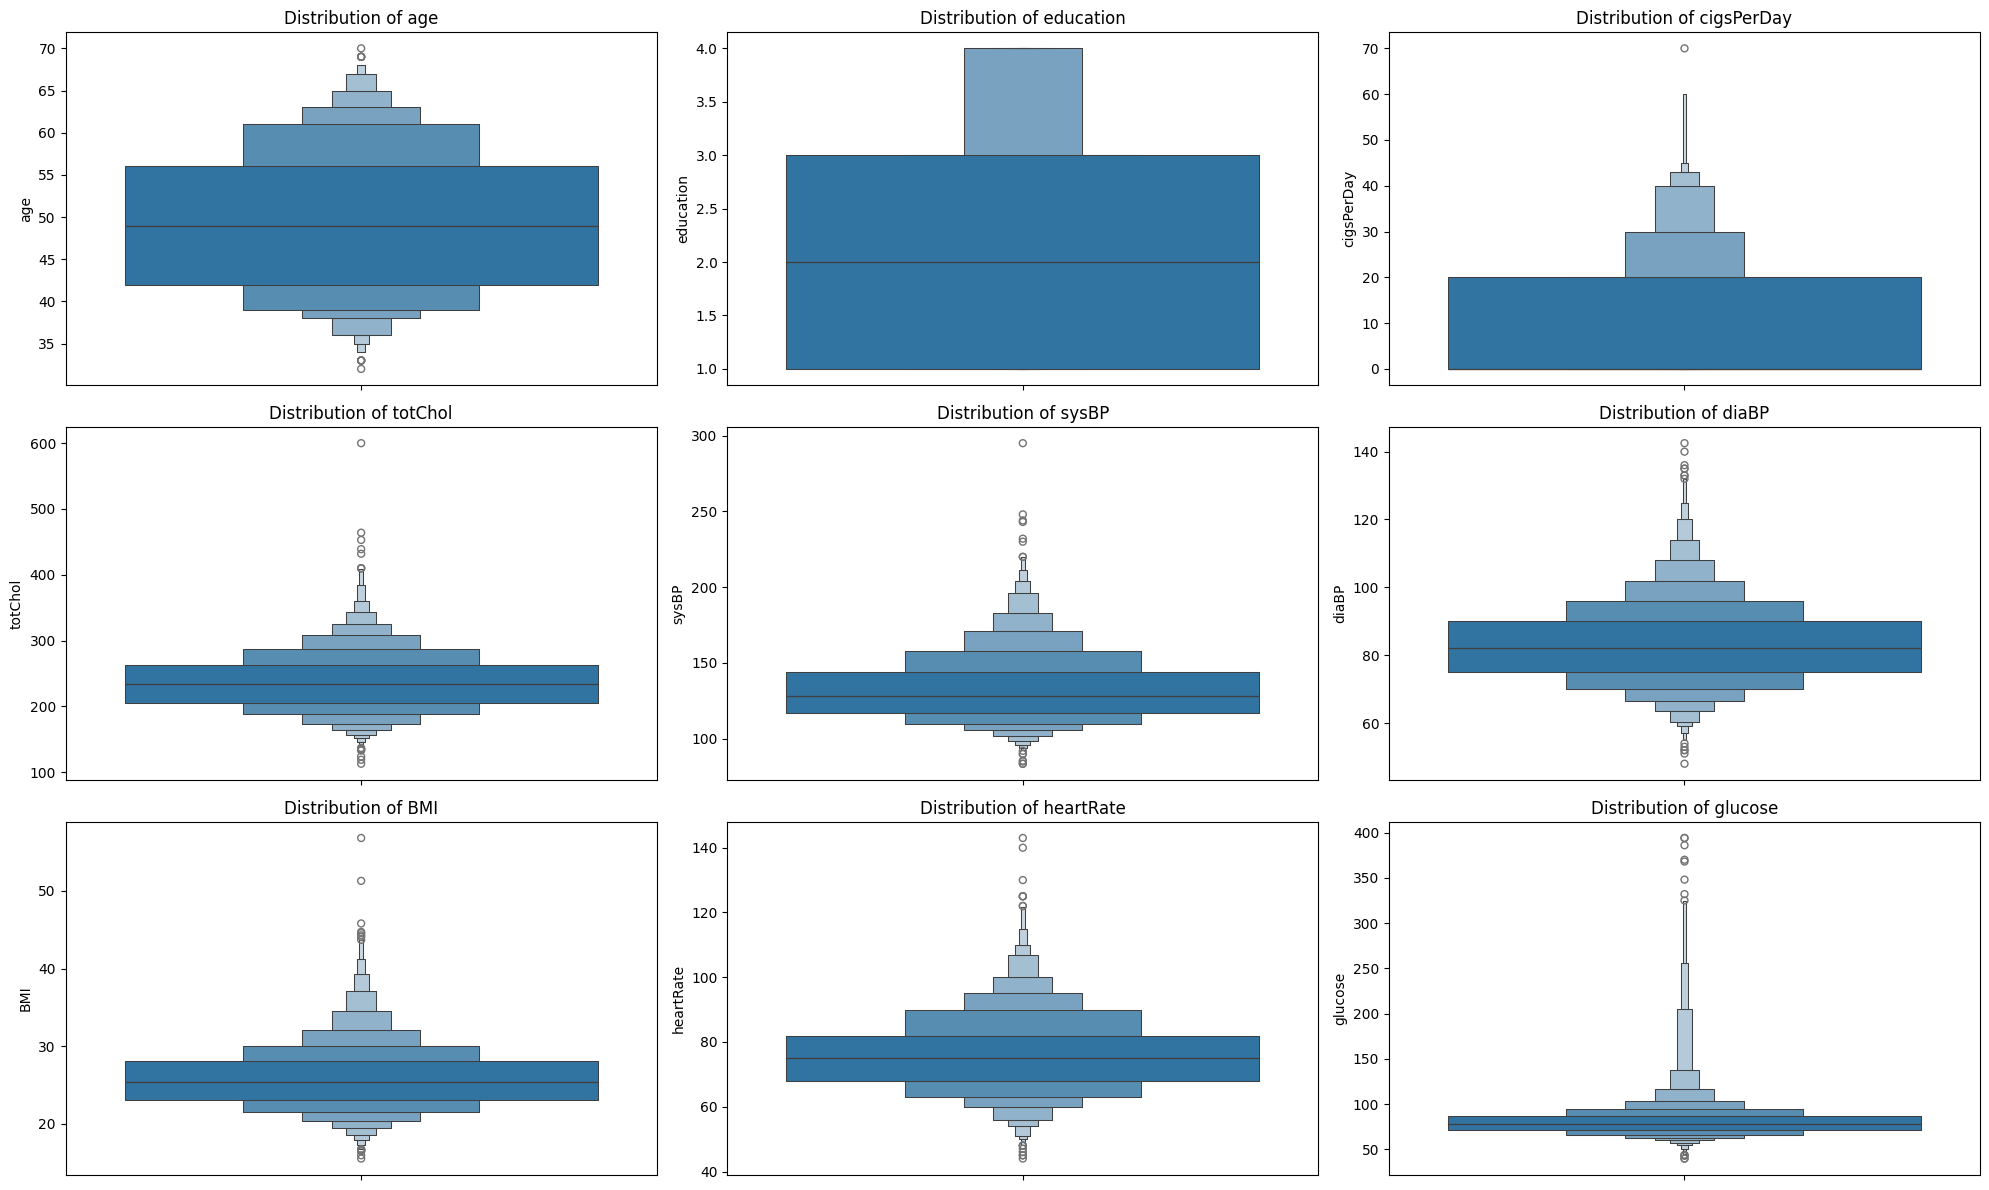

In [11]:
plt.figure(figsize=(20,12))
for index, column in enumerate(data.select_dtypes('number')):
    plt.subplot(3, 3, index+1)
    sns.boxenplot(data[column]).set_title('Distribution of '+ column)
    plt.tight_layout()
    

<h2>Total Cholesterol Levels: totChol</h2>

<table border="1">
  <tr>
    <th>Category</th>
    <th>Cholesterol Level (mg/dL)</th>
  </tr>
  <tr>
    <td>Desirable</td>
    <td>Less than 200 mg/dL</td>
  </tr>
  <tr>
    <td>Borderline High</td>
    <td>200–239 mg/dL</td>
  </tr>
  <tr>
    <td>High</td>
    <td>240 mg/dL and above</td>
  </tr>
</table>



<h2> Classification of Blood Pressure Levels: sysBP and diaBP </h2>

<table border="1">
  <tr>
    <th>Blood Pressure Category</th>
    <th>Systolic (mm Hg)</th>
    <th>Diastolic (mm Hg)</th>
  </tr>
  <tr>
    <td>Normal</td>
    <td>Less than 120</td>
    <td>Less than 80</td>
  </tr>
  <tr>
    <td>Elevated</td>
    <td>120–129</td>
    <td>Less than 80</td>
  </tr>
  <tr>
    <td>Hypertension Stage 1</td>
    <td>130–139</td>
    <td>80–89</td>
  </tr>
  <tr>
    <td>Hypertension Stage 2</td>
    <td>140 or higher</td>
    <td>90 or higher</td>
  </tr>
  <tr>
    <td>Hypertensive Crisis (Emergency)</td>
    <td>Higher than 180</td>
    <td>Higher than 120</td>
  </tr>
</table>


<h2> Body Mass Index: BMI </h2>
<table border="1">
  <tr>
    <th>Category</th>
    <th>BMI Range</th>
  </tr>
  <tr>
    <td>Underweight</td>
    <td>Less than 18.5</td>
  </tr>
  <tr>
    <td>Normal weight</td>
    <td>18.5 – 24.9</td>
  </tr>
  <tr>
    <td>Overweight</td>
    <td>25.0 – 29.9</td>
  </tr>
  <tr>
    <td>Obesity Class 1 (Moderate)</td>
    <td>30.0 – 34.9</td>
  </tr>
  <tr>
    <td>Obesity Class 2 (Severe)</td>
    <td>35.0 – 39.9</td>
  </tr>
  <tr>
    <td>Obesity Class 3 (Very Severe)</td>
    <td>40.0 or higher</td>
  </tr>
</table>


<h2> Hearts Beats Rate: heartRate </h2>
<table border="1">
  <tr>
    <th>Category</th>
    <th>Resting Heart Rate (BPM)</th>
  </tr>
  <tr>
    <td>Bradycardia (Low)</td>
    <td>Less than 60</td>
  </tr>
  <tr>
    <td>Normal (Resting)</td>
    <td>60 – 100</td>
  </tr>
  <tr>
    <td>Tachycardia (High)</td>
    <td>More than 100</td>
  </tr>
</table>


<h2> Blood Glucose: glucose </h2>
<table border="1">
  <tr>
    <th>Category</th>
    <th>Fasting Blood Glucose (mg/dL)</th>
    <th>After Meals (mg/dL)</th>
  </tr>
  <tr>
    <td>Normal</td>
    <td>Less than 100</td>
    <td>Less than 140</td>
  </tr>
  <tr>
    <td>Prediabetes (Impaired)</td>
    <td>100 – 125</td>
    <td>140 – 199</td>
  </tr>
  <tr>
    <td>Diabetes</td>
    <td>126 or higher</td>
    <td>200 or higher</td>
  </tr>
</table>


# 3. Add 'Healthy' Column to the data

In [12]:
# extract healthy people where their indicators are in the normal ranges

data['healthy'] = np.where(
    (0 <= data['cigsPerDay']) & (data['cigsPerDay'] <= 20) &
    (data['BPMeds'] == 'no') &
    (data['prevalentStroke'] == 'no') &
    (data['prevalentHyp'] == 'no') & 
    (data['diabetes'] == 'no') & 
    (125 < data['totChol']) & (data['totChol'] <= 200) &
    (120 <= data['sysBP']) & (data['diaBP'] <= 129) &
    (80 <= data['diaBP']) & (data['diaBP'] <= 84) &
    (18.5 <= data['BMI']) & (data['BMI'] <= 29.9) &
    (60 <= data['heartRate']) & (data['heartRate'] <= 100) &
    (70 <= data['glucose']) & (data['glucose'] <= 100),
    'yes', 'no'
)

data[data.healthy == 'yes']['healthy'].count()

37

In [13]:

df = pd.DataFrame()
# Smokers Types
df['smokerType'] = np.where(
    (data['cigsPerDay'] == 0), 'NoSmoker', np.where(
        (data['cigsPerDay'] > 0) & (data['cigsPerDay'] <= 20), 'Smokers', np.where(
            (data['cigsPerDay'] > 20) & (data['cigsPerDay'] <= 50), 'Dangerous Smokers', 'High Smokers'
    )))

# Cholestroul Types
df['cholType'] = np.where((data['totChol'] < 125), 'LowChol', np.where(
    (data['totChol'] > 125) & (data['totChol'] <= 200), 'NormalChol', np.where(
        (data['totChol'] > 200) & (data['totChol'] <= 239), 'DangerousChol', 'HighChol'
    )))

# Systolic Blood Pressure Types: sysBP
df['sysBPType'] = np.where((data['sysBP'] < 120), 'LowSysBP', np.where(
    (data['sysBP'] >= 120) & (data['sysBP'] <= 129), 'NormalSysBP', np.where(
        (data['sysBP']>= 130) & (data['sysBP'] <= 179), 'DangerousSysBP', 'HighSysBP'
    )))

# Diastolic Blood Pressure
df['diaBPType'] = np.where((data['diaBP'] < 80), 'LowDiaBP', np.where(
    (data['diaBP'] >= 80) & (data['diaBP'] <= 84), 'NormalDiaBP', np.where(
        (data['diaBP']>= 85) & (data['diaBP'] <= 109), 'DangerousDiaBP', 'HighDiaBP'
    )))

# Body Mass Index: BMI
df['BMIType'] = np.where((data['BMI'] < 18.5), 'LowBMI', np.where(
    (data['BMI'] >= 18.5) & (data['BMI'] <= 29.9), 'NormalBMI', np.where(
        (data['BMI']>= 30) & (data['BMI'] <= 39.9), 'DangerousBMI', 'HighBMI'
    )))

# Heart Rate
df['HRType'] = np.where((data['heartRate'] < 60), 'LowHR', np.where(
    (data['heartRate'] >= 60) & (data['heartRate'] <= 100), 'NormalHR', 'DangerousHR'))

# Glocus
df['glucoseType'] = np.where((data['glucose'] < 70), 'LowGlu', np.where(
    (data['glucose'] >= 70) & (data['glucose'] <= 100), 'NormalGlu', 'DangerousGlu'))

# Glocus
df['glucoseType'] = np.where((data['glucose'] < 70), 'LowGlu', np.where(
    (data['glucose'] >= 70) & (data['glucose'] <= 100), 'NormalGlu', 'DangerousGlu'))

df['BPMeds'] = data['BPMeds']
df['prevalentStroke'] = data['prevalentStroke']
df['prevalentHyp'] = data['prevalentHyp']
df['Gender'] = data['sex']
df['CHDRisk'] = data['CHDRisk']
df['Diabets'] = data['diabetes']
df['Healthy'] = data['healthy']
df.dropna(inplace=True)
df

,smokerType,cholType,sysBPType,diaBPType,BMIType,HRType,glucoseType,BPMeds,prevalentStroke,prevalentHyp,Gender,CHDRisk,Diabets,Healthy
0,NoSmoker,NormalChol,LowSysBP,LowDiaBP,NormalBMI,NormalHR,NormalGlu,no,no,no,male,no,no,no
1,NoSmoker,HighChol,NormalSysBP,NormalDiaBP,NormalBMI,NormalHR,NormalGlu,no,no,no,female,no,no,no
2,Smokers,HighChol,NormalSysBP,NormalDiaBP,NormalBMI,NormalHR,NormalGlu,no,no,no,male,no,no,no
3,Dangerous Smokers,DangerousChol,DangerousSysBP,DangerousDiaBP,NormalBMI,NormalHR,DangerousGlu,no,no,yes,female,yes,no,no
4,Dangerous Smokers,HighChol,DangerousSysBP,NormalDiaBP,NormalBMI,NormalHR,NormalGlu,no,no,no,female,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3625,NoSmoker,DangerousChol,DangerousSysBP,NormalDiaBP,DangerousBMI,NormalHR,NormalGlu,no,no,yes,female,no,no,no
3628,NoSmoker,DangerousChol,NormalSysBP,HighDiaBP,NormalBMI,NormalHR,NormalGlu,no,no,no,female,no,no,no
3629,NoSmoker,HighChol,NormalSysBP,NormalDiaBP,NormalBMI,NormalHR,NormalGlu,no,no,no,female,no,no,no
3634,Smokers,HighChol,DangerousSysBP,DangerousDiaBP,NormalBMI,NormalHR,NormalGlu,no,no,yes,male,no,no,no


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3625 entries, 0 to 3635
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   smokerType       3625 non-null   object
 1   cholType         3625 non-null   object
 2   sysBPType        3625 non-null   object
 3   diaBPType        3625 non-null   object
 4   BMIType          3625 non-null   object
 5   HRType           3625 non-null   object
 6   glucoseType      3625 non-null   object
 7   BPMeds           3625 non-null   object
 8   prevalentStroke  3625 non-null   object
 9   prevalentHyp     3625 non-null   object
 10  Gender           3625 non-null   object
 11  CHDRisk          3625 non-null   object
 12  Diabets          3625 non-null   object
 13  Healthy          3625 non-null   object
dtypes: object(14)
memory usage: 424.8+ KB


In [15]:
# List of columns you want to plot
columns_to_plot = df.columns

# Number of columns in the subplot grid
cols_per_row = 3
num_columns = len(columns_to_plot)
num_rows = (num_columns + cols_per_row - 1) // cols_per_row  # Ceiling division

# Create subplots
fig = make_subplots(rows=num_rows, cols=cols_per_row, subplot_titles=columns_to_plot)

# Add histograms to the subplots
for i, column in enumerate(columns_to_plot):
    row = i // cols_per_row + 1
    col = i % cols_per_row + 1
    histogram = go.Histogram(x=df[column])
    fig.add_trace(histogram, row=row, col=col)
    fig.update_xaxes( row=row, col=col)
    fig.update_yaxes(title_text='Count', row=row, col=col)

# Update layout
fig.update_layout(height=300 * num_rows, width=1000, title_text="Histograms of DataFrame Columns", showlegend=False)

# Show the figure
fig.show()


In [16]:
df[df['Healthy'] == 'yes']['Healthy'].count()

37

# Machine Learning: CHDRisk Prediction

-   This a supervised binary classification learning problem.
-   Supervised since we have labels.
-   Since we have only two possible (discrete) values in the 'CHDRisk' column, then we can automatically say that this is a binary classification problem.
-   A subject or an individual can either have the risk or not. No further possibilities are there. YES or NO, TRUE or FALSE, 0 OR 1.
-   We are not predicting a single value such as price, or any other qunatity. We are predicting a class (Risk, or No risk).
-   'CHDRisk' is the label, while the other columns are the features.
-   We can treat features as x, and the labels as y.
-   We want to split the dataset into two partitions: one training part, and one testing part.
-   We want to build a model, feed it with the training data (features and corresponding labels),
     the model learns the patterns that indicate whether a patient has the risk or not.
-   The model later uses the knoweldge it acquired through the learning phase to generalize on the testing data.
-   we will use 4 different supervised classification algorithms, namely:
     - Support Vector Machines (SVM)
     - Logistic Regression
     - Random Forest
     - Gradient Boosting

In [17]:
df = data.copy()

# prepare the dataset, transform columns, and make sure all columns are reprsented as numeric:
df.sex = df.sex.replace('male', 0)
df.sex = df.sex.replace('female', 1)

for col in df.columns:
    df[col] = df[col].replace('no', 0)
    df[col] = df[col].replace('yes', 1)

df.drop(columns=[ 'education', 'healthy'], axis=1, inplace=True)

# make sure all columns have numeric data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3637 entries, 0 to 3673
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              3637 non-null   int64  
 1   age              3637 non-null   int64  
 2   smokingStatus    3637 non-null   int64  
 3   cigsPerDay       3637 non-null   int64  
 4   BPMeds           3637 non-null   int64  
 5   prevalentStroke  3637 non-null   int64  
 6   prevalentHyp     3637 non-null   int64  
 7   diabetes         3637 non-null   int64  
 8   totChol          3637 non-null   int64  
 9   sysBP            3637 non-null   float64
 10  diaBP            3637 non-null   float64
 11  BMI              3637 non-null   float64
 12  heartRate        3637 non-null   int64  
 13  glucose          3637 non-null   int64  
 14  CHDRisk          3637 non-null   int64  
dtypes: float64(3), int64(12)
memory usage: 583.7 KB


Count of Class 0 instances:  3084 ; with a percentage of:  0.85
Count of Class 1 instances:  553  ; with a percentage of:  0.15


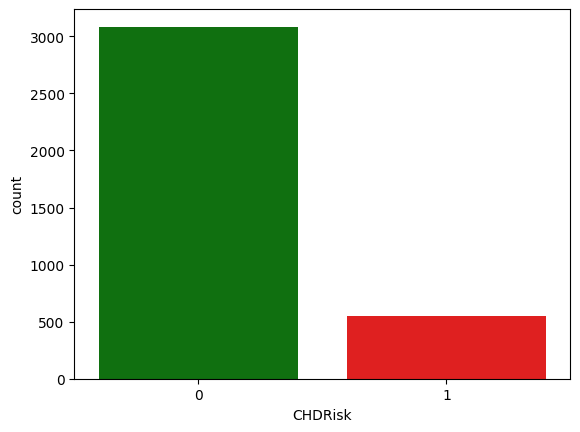

In [18]:
sns.countplot(x='CHDRisk', data=df, palette=['g', 'r'])
class_zero = df[df['CHDRisk'] == 0].shape[0]
class_one = df[df['CHDRisk'] == 1].shape[0]
print('Count of Class 0 instances: ', class_zero, '; with a percentage of: ', round(class_zero/(class_zero + class_one),2 ))
print('Count of Class 1 instances: ', class_one, ' ; with a percentage of: ', round(class_one/(class_zero + class_one),2))

#### Conclusion: we can see that the dataset is highly imbalanced and this will affect the model's ability to make correct predictions in the test phase.

In [19]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score

In [20]:
# split the dataset column-wise into features (x) and labes (y):
x = df.drop('CHDRisk', axis=1)
y = df['CHDRisk']

# split the dataset row-wise into training part and testing part with sizes of 80% and 20% respectively:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True )

In [21]:
x.shape, y.shape

((3637, 14), (3637,))

In [22]:
accuracies = []
f1_scores = []
recalls = []

def fit_test_model(classifier, x_train, x_test, y_train, y_test):
    classifier.fit(x_train, y_train)

    y_pred = classifier.predict(x_test)
    accuracy = accuracy_score(y_pred=y_pred, y_true=y_test)
    f1score = f1_score(y_pred=y_pred, y_true=y_test)
    recall = recall_score(y_pred=y_pred, y_true=y_test)

    accuracies.append(accuracy)
    f1_scores.append(f1score)
    recalls.append(recall)


                     Accuracy  F1-Score  Recall
SVM                      0.84      0.02    0.01
Logistic Regression      0.84      0.07    0.04
Random Forest            0.85      0.17    0.10
Gradient Boosting        0.84      0.18    0.11


<Axes: >

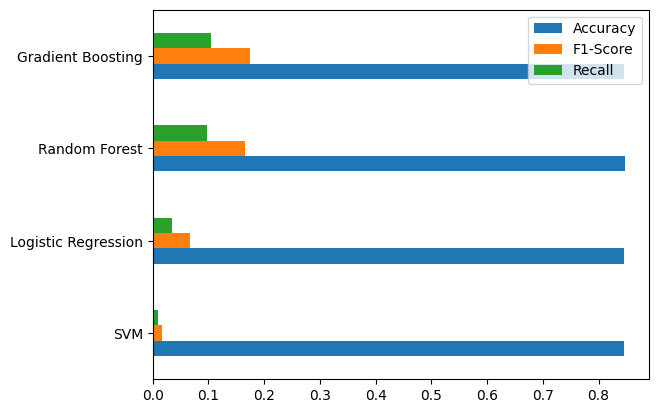

In [23]:

algorithms = ['SVM', 'Logistic Regression', 'Random Forest', 'Gradient Boosting']
accuracies = []
f1_scores = []
recalls = []

classifier_svc = svm.SVC()
classifier_lr = LogisticRegression()
classifier_rf = RandomForestClassifier()
classifier_gb= GradientBoostingClassifier()

fit_test_model(classifier_svc, x_train, x_test, y_train, y_test)
fit_test_model(classifier_lr, x_train, x_test, y_train, y_test)
fit_test_model(classifier_rf, x_train, x_test, y_train, y_test)
fit_test_model(classifier_gb, x_train, x_test, y_train, y_test)

d1 = dict(zip(algorithms, accuracies))
d2 = dict(zip(algorithms, f1_scores))
d3 = dict(zip(algorithms, recalls))
res_default_setting = pd.DataFrame({'Accuracy': d1, 'F1-Score': d2, 'Recall': d3})
print(res_default_setting)

res_default_setting.plot(kind='barh')

#### Conclusion: we can see that the imbalance between the two classes in this dataset led to a very poor performance in terms of classification on data unseen in training phase.

#### Next steps: to resolve this and get a better performance, a few steps can be followed.
1. There is no data like more data. 
    -   The optimal choice is to increase the size of the dataset by adding more rows from the real-world to enhance the presence of the minor class.
    However, data collection and labeling can be very expensive and require experts (doctors) to label the data of patients/subjects.
2. Other possiblities: 
    1. fine-tuning of models, 
    2. oversampling of smaller class, 
    3. undersampling of larger class 

#### 1. Fine-tuning of models
    In this setting, we can control the values of the hyperparameters given to an algorithms.
        class_weight='balanced', this tell the algorithm to pay more attention to the least frequent class in the dataset.
        n_estimators='100', this tell the algorithm to use 100 models to use in the ensemble in order to fit the data

                     Accuracy  F1-Score  Recall
SVM                      0.67      0.40    0.69
Logistic Regression      0.66      0.38    0.67
Random Forest            0.85      0.05    0.03
Gradient Boosting        0.85      0.18    0.11


<Axes: >

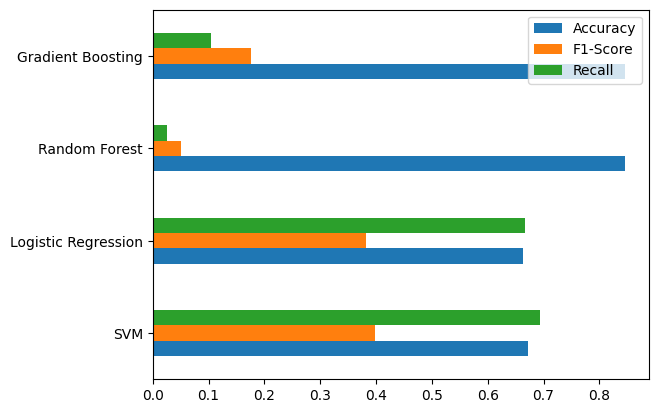

In [24]:
accuracies = []
f1_scores = []
recalls = []

classifier_svc = svm.SVC(class_weight='balanced')
classifier_lr = LogisticRegression(class_weight='balanced')
classifier_rf = RandomForestClassifier(n_estimators=100, class_weight='balanced')
classifier_gb= GradientBoostingClassifier(n_estimators=100)

fit_test_model(classifier_svc, x_train, x_test, y_train, y_test)
fit_test_model(classifier_lr, x_train, x_test, y_train, y_test)
fit_test_model(classifier_rf, x_train, x_test, y_train, y_test)
fit_test_model(classifier_gb, x_train, x_test, y_train, y_test)

d1 = dict(zip(algorithms, accuracies))
d2 = dict(zip(algorithms, f1_scores))
d3 = dict(zip(algorithms, recalls))
res_fine_tuning = pd.DataFrame({'Accuracy': d1, 'F1-Score': d2, 'Recall': d3})
print(res_fine_tuning)

res_fine_tuning.plot(kind='barh')

##### Conclusion: after changing the parameters that control the models, this has slightly imporved the situation as we can see a better Recall and F1-Score with respect to SVM and Logistic Regression algorithms. However, this is still not satisfactory and we still need to improve.

### 2. Over Sampling:
    This increase the size of the least frequnet class by adding more points to it and this way mitigate the imbalance situtation.

In [25]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

over_sampler = RandomOverSampler(random_state=42)
x_resampled, y_resampled = over_sampler.fit_resample(x,y)

print('Shape of data before resampling: {} '.format(Counter(y)))
print('Shape of data after resampling: {} '.format(Counter(y_resampled)))

x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42, shuffle=True )

Shape of data before resampling: Counter({0: 3084, 1: 553}) 
Shape of data after resampling: Counter({0: 3084, 1: 3084}) 


                     Accuracy  F1-Score  Recall
SVM                      0.68      0.67    0.65
Logistic Regression      0.66      0.66    0.66
Random Forest            0.98      0.98    0.99
Gradient Boosting        0.75      0.75    0.76


<Axes: >

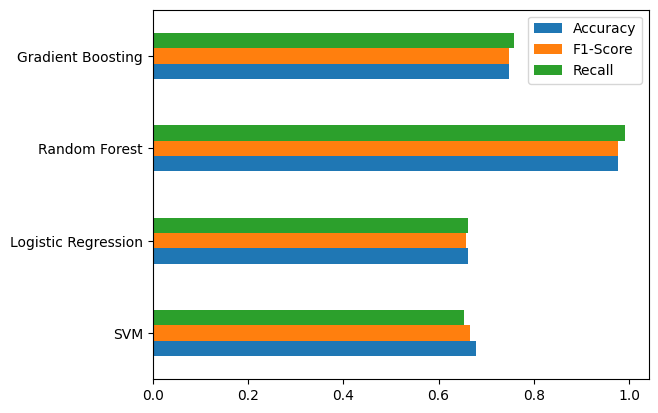

In [26]:
accuracies = []
f1_scores = []
recalls = []

classifier_svc = svm.SVC(class_weight='balanced')
classifier_lr = LogisticRegression(class_weight='balanced')
classifier_rf = RandomForestClassifier(n_estimators=100, class_weight='balanced')
classifier_gb= GradientBoostingClassifier(n_estimators=100)

fit_test_model(classifier_svc, x_train, x_test, y_train, y_test)
fit_test_model(classifier_lr, x_train, x_test, y_train, y_test)
fit_test_model(classifier_rf, x_train, x_test, y_train, y_test)
fit_test_model(classifier_gb, x_train, x_test, y_train, y_test)

d1 = dict(zip(algorithms, accuracies))
d2 = dict(zip(algorithms, f1_scores))
d3 = dict(zip(algorithms, recalls))
res_over_sampling = pd.DataFrame({'Accuracy': d1, 'F1-Score': d2, 'Recall': d3})
print(res_over_sampling)

res_over_sampling.plot(kind='barh')

#### Conclusion: now we can see remarkable improvents compared to eariler scenarios where we barely achieved 85% of accuracy across various algorithms. Now, the Random Forest classifier has been able to exceed 95% in terms of all metrics: accuracy, recall and f1-score.

# Final Conclusion/ Takeaway:
-   Random Forest performed excellently on the dataset, especially when the oversampling technique was used to balance the classes.
-   The oversampling technique led to notable improvements and better-guided learning across the 4 algorithms we studied in this work.